## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
from numpy import genfromtxt

my_data = genfromtxt('RegData.csv', delimiter=',')
print(my_data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Explore your data

In [4]:
df = pd.read_csv('RegData.csv')
df.head()

,2.900000095,4
0,6.7,7.4
1,4.9,5.0
2,7.9,7.2
3,9.8,7.9
4,6.9,6.1


In [5]:
df.shape

(12, 2)

In [6]:
# some summary statistics

df.describe()

,2.900000095,4
count,12.000000,12.000000
mean,6.208333,5.700000
std,1.513250,1.281335
min,4.400000,4.000000
25%,5.050000,4.850000
50%,6.050000,5.500000
75%,6.750000,6.375000
max,9.800000,7.900000


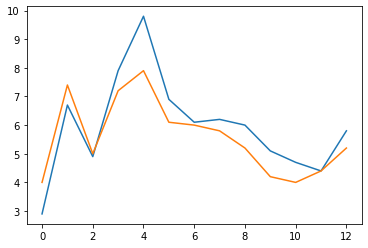

In [7]:
plt.plot(my_data)
plt.show;

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [8]:
data = pd.read_csv('RegData.csv', sep= ',', header=None, names=['X','y'])
print(data)

      X    y
0   2.9  4.0
1   6.7  7.4
2   4.9  5.0
3   7.9  7.2
4   9.8  7.9
5   6.9  6.1
6   6.1  6.0
7   6.2  5.8
8   6.0  5.2
9   5.1  4.2
10  4.7  4.0
11  4.4  4.4
12  5.8  5.2


#### Explore your data

In [9]:
# check what is Data type of Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2.900000095  12 non-null     float64
 1   4            12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


C:\Users\Muslim\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


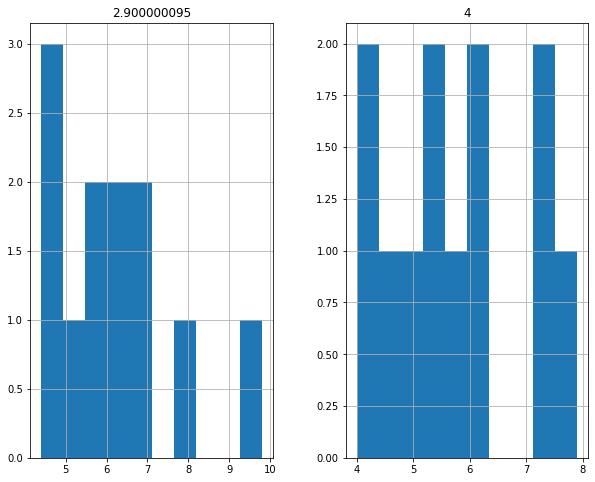

In [10]:
#  look at the histogram of the whole data frame 
df.hist(figsize=(10,8));

#### Plot the original data (scatter plot of X,y)

In [11]:
x_points = my_data[:,0]
y_points = my_data[:,1]

In [12]:
print(x_points)


[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [13]:
print(y_points)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


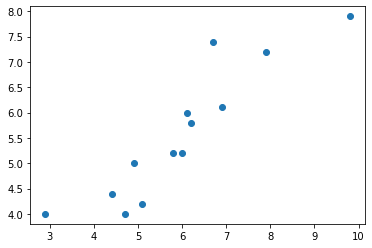

In [14]:

plt.scatter(x_points, y_points)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

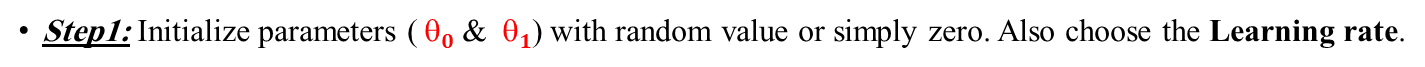

In [15]:
theta0= 0
theta1= 0
#Learning Rate
alpha=0.001


### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.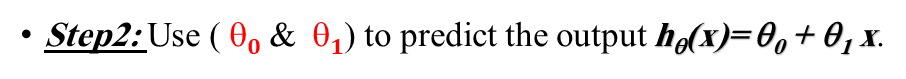
#### Note: you will need to iterate through all data points

In [16]:
hypothesis = theta0 + theta1 * x_points


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).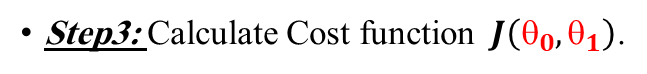
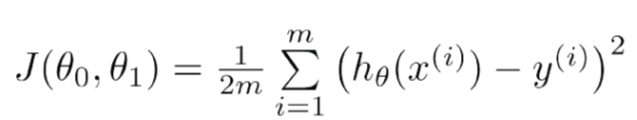

In [17]:
cost_function = (sum(hypothesis - y_points)**2) / (2*len(my_data))

### Step4: Calculate the gradient.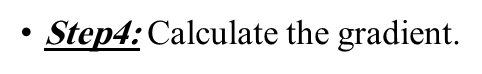
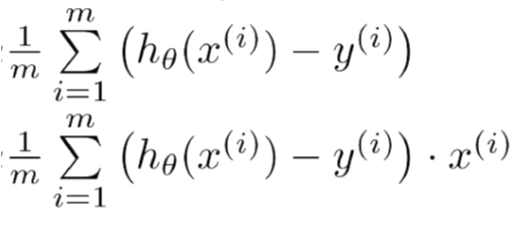

In [18]:
derivative_y =  (sum(hypothesis) - y_points) / (len(my_data))
derivative_x =  ((sum(hypothesis) - y_points)* x_points) / (len(my_data))


### Step5: Update the parameters (simultaneously).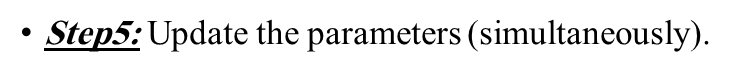
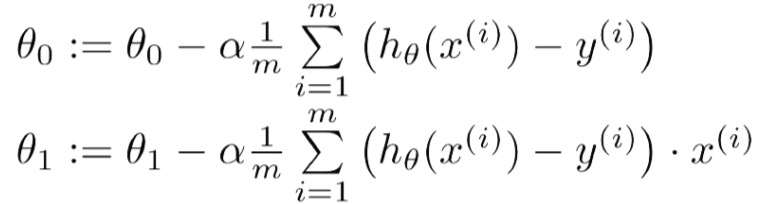

In [19]:
theta0 = theta0 - alpha * derivative_y
theta1 = theta1 - alpha * derivative_x

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.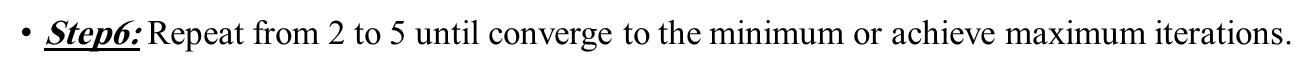

In [20]:
def Gradient_Descent(x_points,y_points,alpha,iterations):
    theta_0= 0
    theta_1= 0
    alpha =0.001
   
    cost =[]
    All_theta_0 =[]
    All_theta_1 =[]
    All_hypothesis =[]
    
    max_iterations =500
    
    for i in range(0,max_iterations):
        
        hypothesis = theta_0 + theta_1 * x_points
        All_hypothesis.append(hypothesis)
        
        All_theta_0.append(theta_0)
        All_theta_1.append(theta_1)
        
        cost_function = (sum(hypothesis - y_points)**2) / (2*len(x_points))
        cost.append(cost_function)
        
        
        derivative_y =  np.sum(hypothesis - y_points) / (len(x_points))
        derivative_x =  np.sum((hypothesis - y_points)* x_points) / (len(x_points))
        
        theta_0 = theta_0 - alpha * derivative_y
        theta_1 = theta_1 - alpha * derivative_x
        
        optimum_theta0 = theta_0
        optimum_theta1 = theta_1
        
        
        
          
        
        
    return All_theta_0,All_theta_1,cost,All_hypothesis,optimum_theta0,optimum_theta1,hypothesis
        
        
        
        
        
    

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [21]:
All_theta_0,All_theta_1, cost , All_hypothesis,optimum_theta0,optimum_theta1,hypothesis = Gradient_Descent(x_points,y_points,0.001,500)

In [22]:
print(hypothesis)

[2.76488137 6.14642145 4.54463944 7.21427655 8.9050468  6.32439751
 5.61249411 5.70148193 5.52350629 4.72261508 4.36666338 4.09969992
 5.34553066]


In [23]:
print(All_theta_0)

[0, 0.00556923073976923, 0.010924246580564925, 0.01607342171768198, 0.021024802968708463, 0.025786122571909754, 0.030364810484277395, 0.03476800619880247, 0.03900257009976888, 0.04307509437412689, 0.04699191349630147, 0.05075911430311137, 0.054382545674823, 0.057867827837736724, 0.06122036130310127, 0.06444533545657348, 0.06754773681188486, 0.07053235694184237, 0.07340380009927748, 0.07616649054006468, 0.07882467955985663, 0.0813824522557277, 0.08384373402348032, 0.08621229680094801, 0.088491765067225, 0.09068562160736422, 0.0927972130517122, 0.09482975519869129, 0.09678633812949504, 0.09866993112283146, 0.10048338737753114, 0.10222944855053147, 0.10391074911745457, 0.10552982056271434, 0.10708909540581708, 0.10859091107025928, 0.11003751360117625, 0.11143106123765428, 0.11277362784538816, 0.11406720621514364, 0.11531371123227102, 0.11651498292231091, 0.11767278937753625, 0.11878882956908507, 0.11986473604915689, 0.12090207754757029, 0.1219023614668118, 0.12286703627954405, 0.123797493

In [24]:
print(All_theta_1)

[0, 0.03504384604321537, 0.06871715274511, 0.10107349950678265, 0.13216437111584672, 0.1620392396324827, 0.19074564307426725, 0.21832926102492636, 0.24483398728726768, 0.2703019996958457, 0.294773827200396, 0.3182884143267348, 0.34088318311764704, 0.3625940926522804, 0.38345569623870995, 0.40350119637063786, 0.4227624975356353, 0.441270256958919, 0.45905393336336897, 0.47614183382333963, 0.4925611587867857, 0.5083380453373092, 0.5234976087649361, 0.5380639825117403, 0.5520603565558473, 0.5655090142948689, 0.5784313679874293, 0.5908479928091541, 0.6027786595772858, 0.6142423661959764, 0.6252573678722684, 0.6358412061508236, 0.646010736813579, 0.6557821566887033, 0.6651710294114945, 0.6741923101781899, 0.6828603695320598, 0.6911890162196166, 0.6991915191532915, 0.7068806285155103, 0.7142685960377342, 0.7213671944867195, 0.7281877363889879, 0.7347410920232901, 0.7410377067096778, 0.747087617422684, 0.7529004687550324, 0.7584855282572687, 0.7638517011777092, 0.7690075446261515, 0.773961281

In [25]:
print(cost)

[201.6061517131385, 186.39526525862325, 172.34102985257897, 159.35514590460764, 147.3560683648879, 136.26848949260005, 126.02286125267808, 116.55495430389107, 107.80545077402891, 99.7195682329108, 92.24671247238952, 85.3401568857761, 78.95674640830963, 73.05662413652983, 67.60297888866458, 62.56181210134667, 57.901722580959344, 53.59370774147562, 49.61098006551025, 45.92879762212613, 42.524307564333135, 39.37640161176444, 36.46558260023537, 33.773841250265086, 31.284542371625506, 28.98231978098295, 26.85297926510138, 24.88340897323191, 23.061496669549335, 21.376053320111037, 19.816742529085445, 18.374015376183547, 17.03905024156124, 15.80369723616488, 14.660426884765815, 13.602282735960053, 12.622837598367806, 11.716153125313324, 10.87674249154504, 10.099535925204142, 9.37984887639345, 8.713352620449456, 8.096047109490183, 7.524235900093383, 6.994502998148786, 6.503691474105491, 6.04888371308006, 5.6273831746737155, 5.236697546934353, 4.874523187751099, 4.538730755143765, 4.22735193545

In [26]:
print(All_hypothesis)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.10719639, 0.24036299, 0.17728408, 0.28241562, 0.34899893,
       0.24737177, 0.21933669, 0.22284107, 0.21583231, 0.18429284,
       0.1702753 , 0.15976216, 0.20882354]), array([0.210204  , 0.47132916, 0.3476383 , 0.55378976, 0.68435236,
       0.48507261, 0.43009887, 0.43697058, 0.42322716, 0.36138172,
       0.33389485, 0.31327973, 0.40948375]), array([0.30918658, 0.69326585, 0.51133358, 0.81455408, 1.00659374,
       0.71348058, 0.63262176, 0.6427291 , 0.62251442, 0.53154826,
       0.49111885, 0.46079683, 0.60229974]), array([0.40430149, 0.90652606, 0.66863023, 1.06512335, 1.31623567,
       0.93295898, 0.82722745, 0.84044388, 0.81401103, 0.69506308,
       0.64219732, 0.60254805, 0.78757818]), array([0.49569993, 1.111449  , 0.81977841, 1.30589613, 1.6137707 ,
       1.14385689, 1.01422547, 1.03042938, 0.99802156, 0.85218623,
       0.78737052, 0.73875879, 0.96561374]), array([0.58352719, 1.30836058, 0.96501848, 

       4.36666338, 4.09969992, 5.34553066])]


In [27]:
print(optimum_theta0)

0.18431887179602402


In [28]:
print(optimum_theta1)

0.889865470766229


### Plot cost function Vs. Iterations

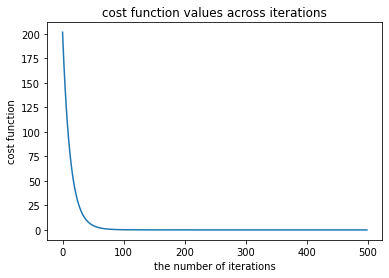

In [29]:
plt.plot(cost)
plt.xlabel('the number of iterations')
plt.ylabel('cost function')
plt.title('cost function values across iterations')
plt.show()

### Plot theta_0 Vs. cost function

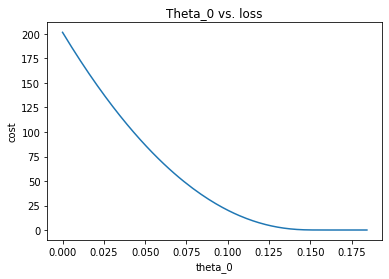

In [30]:
plt.plot(All_theta_0, cost)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

### Plot theta_1 Vs. cost function

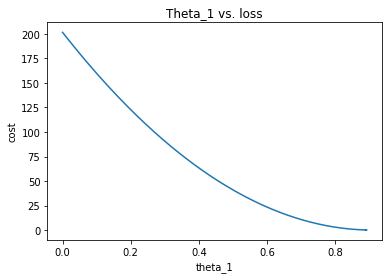

In [31]:
plt.plot(All_theta_1, cost)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

In [32]:
All_theta_0

[0,
 0.00556923073976923,
 0.010924246580564925,
 0.01607342171768198,
 0.021024802968708463,
 0.025786122571909754,
 0.030364810484277395,
 0.03476800619880247,
 0.03900257009976888,
 0.04307509437412689,
 0.04699191349630147,
 0.05075911430311137,
 0.054382545674823,
 0.057867827837736724,
 0.06122036130310127,
 0.06444533545657348,
 0.06754773681188486,
 0.07053235694184237,
 0.07340380009927748,
 0.07616649054006468,
 0.07882467955985663,
 0.0813824522557277,
 0.08384373402348032,
 0.08621229680094801,
 0.088491765067225,
 0.09068562160736422,
 0.0927972130517122,
 0.09482975519869129,
 0.09678633812949504,
 0.09866993112283146,
 0.10048338737753114,
 0.10222944855053147,
 0.10391074911745457,
 0.10552982056271434,
 0.10708909540581708,
 0.10859091107025928,
 0.11003751360117625,
 0.11143106123765428,
 0.11277362784538816,
 0.11406720621514364,
 0.11531371123227102,
 0.11651498292231091,
 0.11767278937753625,
 0.11878882956908507,
 0.11986473604915689,
 0.12090207754757029,
 0.1219

In [33]:
All_theta_1

[0,
 0.03504384604321537,
 0.06871715274511,
 0.10107349950678265,
 0.13216437111584672,
 0.1620392396324827,
 0.19074564307426725,
 0.21832926102492636,
 0.24483398728726768,
 0.2703019996958457,
 0.294773827200396,
 0.3182884143267348,
 0.34088318311764704,
 0.3625940926522804,
 0.38345569623870995,
 0.40350119637063786,
 0.4227624975356353,
 0.441270256958919,
 0.45905393336336897,
 0.47614183382333963,
 0.4925611587867857,
 0.5083380453373092,
 0.5234976087649361,
 0.5380639825117403,
 0.5520603565558473,
 0.5655090142948689,
 0.5784313679874293,
 0.5908479928091541,
 0.6027786595772858,
 0.6142423661959764,
 0.6252573678722684,
 0.6358412061508236,
 0.646010736813579,
 0.6557821566887033,
 0.6651710294114945,
 0.6741923101781899,
 0.6828603695320598,
 0.6911890162196166,
 0.6991915191532915,
 0.7068806285155103,
 0.7142685960377342,
 0.7213671944867195,
 0.7281877363889879,
 0.7347410920232901,
 0.7410377067096778,
 0.747087617422684,
 0.7529004687550324,
 0.7584855282572687,
 0.7

#### Plot all regression lines till converge

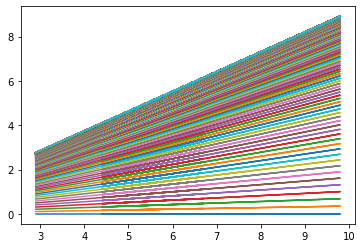

In [34]:
for i in range(len(All_hypothesis)):
    plt.plot(x_points,All_hypothesis[i])
plt.show()

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

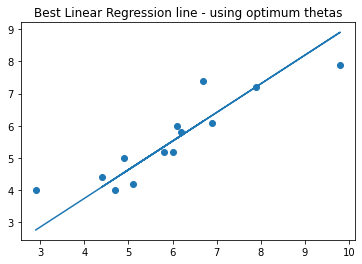

In [35]:
plt.scatter(x_points, y_points)
plt.plot(x_points,hypothesis)
plt.title('Best Linear Regression line - using optimum thetas')
plt.show()

#### Use R2 score to evaluate LR equation output
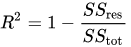
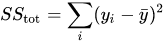
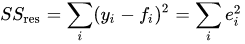
https://en.wikipedia.org/wiki/Coefficient_of_determination

In statistics, the coefficient of determination, denoted R2 or r2, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [36]:
from sklearn.metrics import r2_score

In [37]:
sklearn.metrics.r2_score(hypothesis,y_points)

0.8157806549488565

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [38]:
cost_function = (sum(hypothesis - y_points)**2) / (2*len(my_data))

In [39]:
def Gradient_Descent(x_points,y_points,alpha,iterations):
    theta_0= 0
    theta_1= 0
    alpha =0.001
   
    cost =[]
    All_theta_0 =[]
    All_theta_1 =[]
    All_hypothesis =[]
    
    max_iterations =1700
    
    for i in range(0,max_iterations):
        
        hypothesis = theta_0 + theta_1 * x_points
       
        
    
        cost_function = (sum(hypothesis - y_points)**2) / (2*len(x_points))
        cost.append(cost_function)
        
        
        derivative_y =  np.sum(hypothesis - y_points) / (len(x_points))
        derivative_x =  np.sum((hypothesis - y_points)* x_points) / (len(x_points))
        
        theta_0 = theta_0 - alpha * derivative_y
        theta_1 = theta_1 - alpha * derivative_x
        
        optimum_theta0 = theta_0
        optimum_theta1 = theta_1
        
        
        
          
        
        
    return cost,optimum_theta0,optimum_theta1,hypothesis
        
        
        
        
        
    

In [40]:
theta=(theta0,theta1)
max_iterations =1700
cost,optimum_theta0,optimum_theta1,hypothesis = Gradient_Descent(x_points,y_points,0.001,1700)

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

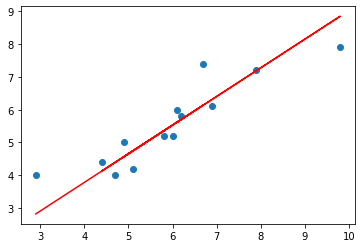

In [41]:
plt.scatter(x_points,y_points);
plt.plot(x_points,hypothesis,'r');
plt.show()

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_points, hypothesis)

0.7623150679988931

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

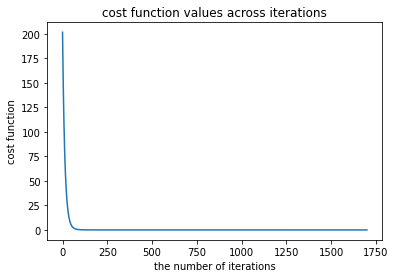

In [44]:
#Already done in the gradient descent step
plt.plot(cost)
plt.xlabel('the number of iterations')
plt.ylabel('cost function')
plt.title('cost function values across iterations')
plt.show()

### Plot loss vs. iterations

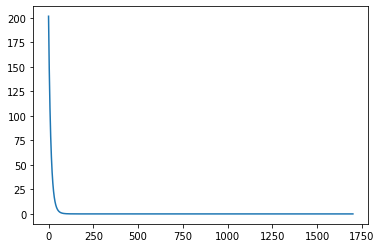

In [45]:
plt.plot(list(range(max_iterations)),cost);
plt.show();

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [46]:
#Read Data into numpy array
from numpy import genfromtxt

data = genfromtxt('MultipleLR.csv', delimiter=',')
print(data)

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [76]:
#print(arr)
features= data[:,:-1]
exact_output= data[:,-1].reshape(-1,1)
print(features)
print(exact_output)
exact_output.shape

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


(25, 1)

In [77]:
# Create x_0 features and it equals ones
ones=np.ones(features.shape[0])
print(ones)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [78]:
# Add x_0 features to data
features= np.insert(features, 0, ones, axis=1)
print(features,'\n\n',exact_output)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]] 

 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [79]:
print(len(features))

25


In [80]:
print(len(exact_output))

25


In [81]:
# create x_0 vector
thetas=np.zeros(features.shape[1])
thetas.reshape(-1,1).shape




(4, 1)

In [82]:
def hypothesis2(x,thetas):
    hypothesis= (x@thetas)
    return hypothesis

In [83]:
hypothesis2(features,thetas)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
def cost2(x,y,thetas):
    hypothesis= hypothesis2(x,thetas).reshape(-1.1)
    print(hypothesis)
    mean_square_error= (1/(2*x.shape[0]))*((hypothesis-y).T((hypothesis-y)))
    return mean_square_error

In [89]:
cost2(features,exact_output,thetas)
cost2

TypeError: 'float' object cannot be interpreted as an integer

In [57]:
def GD2(x,y,thetas,alpha,iter):
    errors=[]
    for i in range(iter):
        hypothesis=hypothesis2(x,thetas)
        #print(hypothesis)
        mean_err= (1/len(y))*(np.transpose(x)@(hypothesis-y))
        #print(mean_err)
        for j in range(len(thetas)):
            thetas[j]= thetas[j]-alpha*mean_err[j]
            errors.append(cost2(x,y,thetas))
        return thetas,errors

### Repeat your implementation but for more than one variable

In [58]:
#Already done in the pervious steps

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [59]:
hypothesis2(features,thetas)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

### Plot loss vs. iterations

In [60]:
iter=500
alpha =0.01
thetas,j2= GD2(features,exact_output,thetas,alpha,iter)
j2

[8215452.02005, 33103071359.72623, 135890687790.95168, 318376285896.7073]

In [61]:
print(len(features))

25


In [62]:
print(len(exact_output))

25


ValueError: x and y must have same first dimension, but have shapes (500,) and (4,)

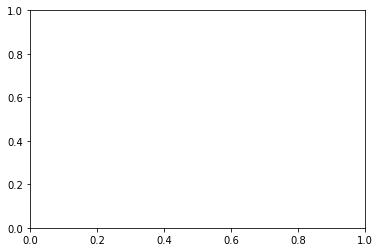

In [63]:
plt.plot(list(range(iter)),j2);
plt.show();

In [ ]:
plt.scatter(features,exact_output);
plt.plot(features,hypothesis2(features,thetas),'r');
plt.show()

#### Use R2 score to evaluate LR equation output

In [ ]:
from sklearn.metrics import r2_score
r2_score(exact_output, hypothesis2(features,thetas))

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [ ]:
from sklearn import linear_model as lm
from array import array

#### Train the model (fit the model to the training data)

In [ ]:

reg = lm.LinearRegression().fit(x_points.reshape(-1, 1), y_points.reshape(-1, 1))
reg.score(x_points.reshape(-1, 1), y_points.reshape(-1, 1))

In [ ]:
reg.coef_

#### Predict y values using the trained model

In [ ]:
pred=reg.predict(x_points.reshape(-1, 1))
pred

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

In [ ]:
plt.scatter(x_points,y_points);
plt.plot(x_points,pred,'r');
plt.show()

#### Use R2 score to evaluate model output

In [ ]:
r2_score(y_points,pred)

### Repeat for Mulivariate